Companies worldwide report their greenhouse gas emissions by dividing them between direct emissions (Scope 1) and indirect emissions (Scope 2). Multiplying the absolute emissions by the CO2 Damage Cost – the dollar cost for each ton of CO2-equivalent emitted – one obtains the Scope 1 and Scope 2 Damage Costs for all companies, as provided in the Excel file.

Given the difference in size of companies, it’s crucial to normalize the damage costs to be able to perform meaningful analysis on them. For this purpose, we propose to calculate the Impact Ratio, as the Damage Cost divided by the total revenues of each company. 
It’s expected that companies will have a higher or lower impact ratio depending on their business and the current case study aims to assess if this expectation meets reality.

**Data inputs:**

The attached Impact_Ratio_Assignment.xlsx contains data tables that may assist you in answering the queries below. You’re free to use other outside information to supplement the analysis, but you’re expected to use the data provided. The attached Excel contain the following sheets: 
1.	Table 1: The company’s Scope 1 and Scope 2 Damage Costs 
2.	Table 2: The company’s GICS industry allocation 

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [26]:
# Load data
data_path = "Copy of Case Study_Data Scientist_S1_Impact_Ratio_Assignment (004).xlsx"
sheets = pd.read_excel(data_path, sheet_name=None, index_col=0)

damage_df = sheets["Table 1"]
industry_df = sheets["Table 2"]

# Join on CompanyID
df = industry_df.join(damage_df).sort_values("CompanyID")
assert len(df) == len(damage_df)  # Assert no company is left behind

# Rename columns
df.columns = ["IndustryGroup", "TotalRevenue", "DamageCost_Direct", "DamageCost_Indirect"]

df.head(5)

,IndustryGroup,TotalRevenue,DamageCost_Direct,DamageCost_Indirect
CompanyID,,,,
COM0001,Financial Services,16338.000,0.338315,4.247979
COM0002,Banks,541.302,0.022633,0.134260
COM0003,Banks,6943.000,0.240284,2.613041
COM0004,Banks,7661.559,0.928260,1.819234
COM0005,Banks,7823.000,0.523893,2.927635


In [83]:
df.describe()

,TotalRevenue,DamageCost_Direct,DamageCost_Indirect,ImpactRatio_Direct,ImpactRatio_Indirect
count,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000
mean,8913.320889,4.349717e+04,15.767660,0.833821,0.833821
std,23854.406534,2.335915e+06,69.893906,44.194297,44.194297
min,0.121100,0.000000e+00,0.000000,0.000000,0.000000
25%,912.898386,1.801503e-01,0.381507,0.000109,0.000109
50%,2612.386613,1.390032e+00,1.823798,0.000540,0.000540
75%,7626.000000,1.152834e+01,8.721362,0.002815,0.002815
max,493700.155599,1.257279e+08,2179.249475,2378.714582,2378.714582


## Exercise 1:

> As Data Scientist you’re tasked to analyze environmental data coming from an internal database, covering Scope 1 and Scope 2 Damage Costs and Revenues (please note not all companies have data available). 
The target of this first exercise is to calculate the Impact Ratios of companies and to create a narrative around industries with higher and lower Impact Ratios. The Impact Ratio of a company is defined as the Damage Cost divided by the Total Revenues. These values are provided in the Table 1 of the Excel provided, for Scope 1 and Scope 2. Industries are separately provided in Table 2. 

In [66]:
df.value_counts("IndustryGroup")

IndustryGroup
Capital Goods                                     402
Materials                                         354
Banks                                             227
Financial Services                                206
Utilities                                         178
Transportation                                    151
Energy                                            145
Technology Hardware & Equipment                   142
Pharmaceuticals, Biotechnology & Life Sciences    140
Food, Beverage & Tobacco                          139
Software & Services                               139
Equity Real Estate Investment Trusts (REITs)      114
Commercial & Professional Services                111
Consumer Durables & Apparel                       107
Health Care Equipment & Services                  106
Insurance                                         101
Consumer Discretionary Distribution & Retail      101
Automobiles & Components                           94
Real Estate Ma

**Analyzing missing values**

In [27]:
df.isnull().sum()

IndustryGroup            0
TotalRevenue           572
DamageCost_Direct      572
DamageCost_Indirect    572
dtype: int64

In [50]:
nan_companies = df.isna().any(axis=1)
df[nan_companies].head()

,IndustryGroup,TotalRevenue,DamageCost_Direct,DamageCost_Indirect
CompanyID,,,,
COM0011,Banks,NaN,NaN,NaN
COM0016,Banks,NaN,NaN,NaN
COM0017,Banks,NaN,NaN,NaN
COM0018,Banks,NaN,NaN,NaN
COM0020,Banks,NaN,NaN,NaN


In [ ]:
# Are the missing values related? If no direct also no indirect and revenue?
df[nan_companies].describe()

# All data missing, not just one column

,TotalRevenue,DamageCost_Direct,DamageCost_Indirect
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [ ]:
df[nan_companies].fillna(1).groupby("IndustryGroup").count()

# Across all industries

,TotalRevenue,DamageCost_Direct,DamageCost_Indirect
IndustryGroup,,,
Automobiles & Components,14,14,14
Banks,41,41,41
Capital Goods,64,64,64
Commercial & Professional Services,18,18,18
Consumer Discretionary Distribution & Retail,20,20,20
Consumer Durables & Apparel,20,20,20
Consumer Services,23,23,23
Consumer Staples Distribution & Retail,13,13,13
Energy,18,18,18


In [ ]:
# Remove them, imputation?
# Put zero, estimate?
# Based on Industry? Based on direct?

In [ ]:
# Dropping for now
df = df[np.logical_not(nan_companies)]
df.value_counts("IndustryGroup")

IndustryGroup
Capital Goods                                     338
Materials                                         314
Banks                                             186
Utilities                                         167
Financial Services                                154
Transportation                                    132
Technology Hardware & Equipment                   129
Energy                                            127
Food, Beverage & Tobacco                          123
Pharmaceuticals, Biotechnology & Life Sciences    117
Software & Services                               105
Equity Real Estate Investment Trusts (REITs)       98
Commercial & Professional Services                 93
Consumer Durables & Apparel                        87
Health Care Equipment & Services                   84
Consumer Discretionary Distribution & Retail       81
Automobiles & Components                           80
Real Estate Management & Development               80
Semiconductors

**Visualizing**

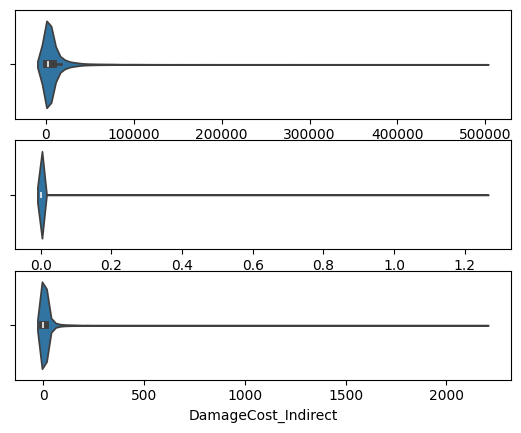

In [ ]:
fig, axes = plt.subplots(3, 1)

# I could use a loop here
sns.violinplot(
    df,
    x="TotalRevenue",
    ax=axes[0]
)

sns.violinplot(
    df,
    x="DamageCost_Direct",
    ax=axes[1]
)

sns.violinplot(
    df,
    x="DamageCost_Indirect",
    ax=axes[2]
)

plt.show()

**Analyzing outliers**

7626.0 11.5283438117802 8.7213617959613


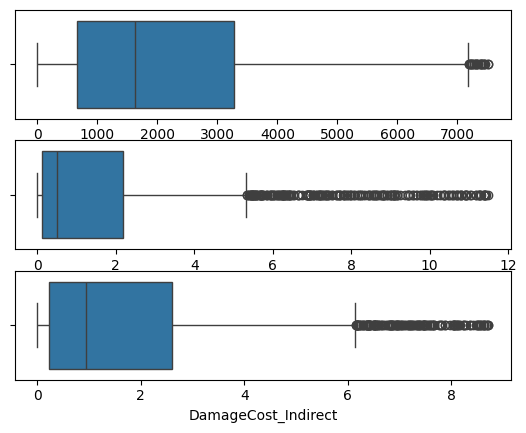

In [82]:
# Those above the q75?
# Why are outliers? Noisy, capped?
# Probably real

# I could use a loop here
q75_revenue = np.quantile(df["TotalRevenue"], q=.75)
q75_direct = np.quantile(df["DamageCost_Direct"], q=.75)
q75_indirect = np.quantile(df["DamageCost_Indirect"], q=.75)

print(q75_revenue, q75_direct, q75_indirect)


fig, axes = plt.subplots(3, 1)

# I could use a loop here
sns.boxplot(
    df[df["TotalRevenue"] < q75_revenue],
    x="TotalRevenue",
    ax=axes[0]
)

sns.boxplot(
    df[df["DamageCost_Direct"] < q75_direct],
    x="DamageCost_Direct",
    ax=axes[1]
)

sns.boxplot(
    df[df["DamageCost_Indirect"] < q75_indirect],
    x="DamageCost_Indirect",
    ax=axes[2]
)

plt.show()

In [ ]:
df[
    (df["DamageCost_Direct"] > q75_direct) |
    (df["DamageCost_Indirect"] > q75_indirect)
].value_counts("IndustryGroup")

# Makes sense
# I guess insurance and could be related to the companies that works with

IndustryGroup
Materials                                         215
Utilities                                         121
Capital Goods                                      98
Energy                                             95
Transportation                                     72
Food, Beverage & Tobacco                           62
Automobiles & Components                           48
Technology Hardware & Equipment                    44
Semiconductors & Semiconductor Equipment           33
Telecommunication Services                         32
Consumer Staples Distribution & Retail             23
Consumer Services                                  21
Health Care Equipment & Services                   19
Pharmaceuticals, Biotechnology & Life Sciences     18
Real Estate Management & Development               16
Consumer Discretionary Distribution & Retail       15
Banks                                              13
Commercial & Professional Services                 13
Consumer Durab

**Calculating Impact Ratios**

In [ ]:
df["ImpactRatio_Direct"] = df["DamageCost_Direct"] / df["TotalRevenue"]
df["ImpactRatio_Indirect"] = df["DamageCost_Direct"] / df["TotalRevenue"]

**Visualizing Impact Ratios**

In [ ]:
# Sort columns by ratio
df_group_industry = df.groupby("IndustryGroup").median() # Median less sensitive to outliers than mean

order_direct = df_group_industry.sort_values("ImpactRatio_Direct", ascending=False).index
order_indirect = df_group_industry.sort_values("ImpactRatio_Indirect", ascending=False).index

<Axes: xlabel='ImpactRatio_Direct', ylabel='Count'>

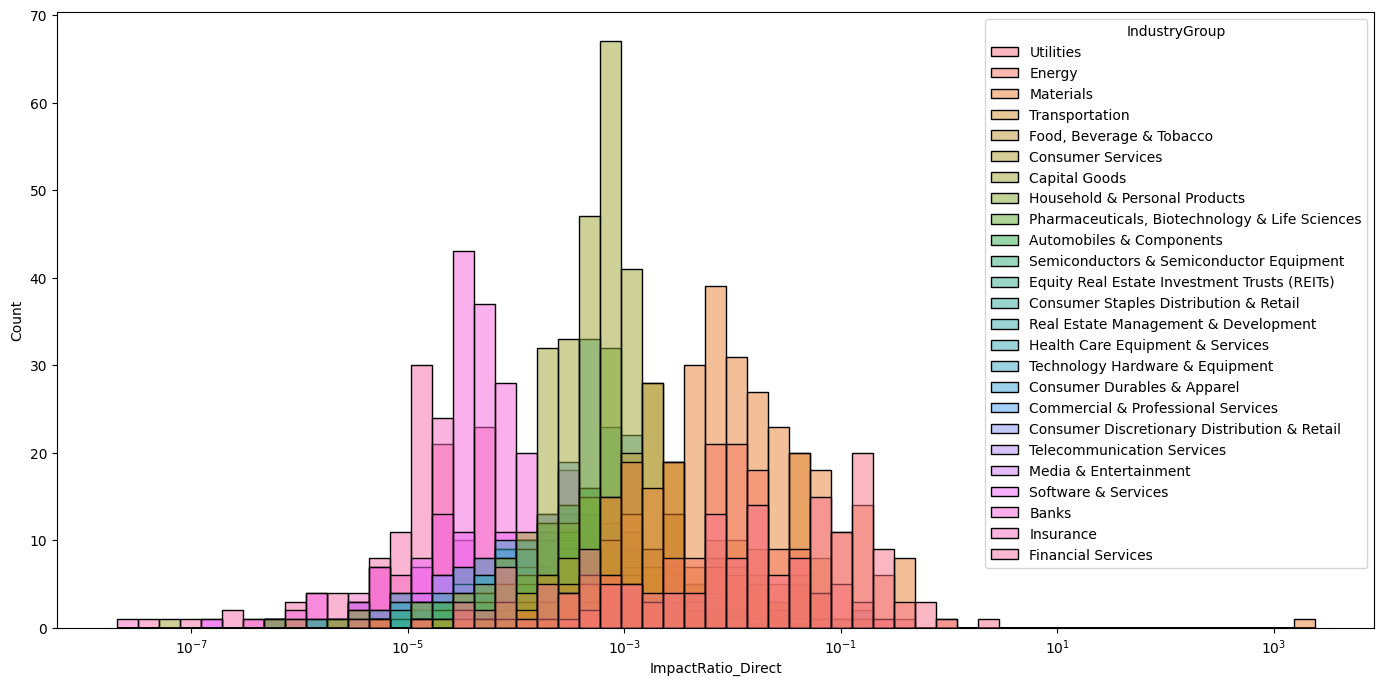

In [118]:
plt.figure(figsize=(17, 8))

sns.histplot(
    df,
    x="ImpactRatio_Direct",
    log_scale=True,
    hue="IndustryGroup",
    hue_order=order_direct,
    # multiple="stack",

)

# TODO: Split in multiple plots

**Analyzing Impact Ratios by industry**

## Exercise 2:
	
> Leveraging the work done in the first exercise, your task now is to deepen the analysis on Impact Ratios, by defining a scoring logic for companies. Each company shall receive a score between 0 and 100 depending on their Scope 1 and Scope 2 Impact Ratios (separately). You’re free to assign the score using the method you consider more relevant, but beware of outliers. 

> Hint: Assign a 0-100 score is easier when the underlying data is normally distributed (or close to normal at least), because in this case simple rank or linear functions can work well. Look at the distribution of Impact Ratios overall, you might want to apply transformations (e.g. natural logarithm) before converting them to scores. 

In [ ]:
# Use something relative to the industry
# If high in the industry, penalize

# Use something relative to the whole
# e.g. high in 

In [ ]:
# Can be different
df["ScoreDirect"] = 
df["ScoreIndirect"] = 

## References

S&P Global ESG Scores Methodology
https://portal.s1.spglobal.com/survey/documents/spglobal_esg_scores_methodology.pdf